In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
import pygeos as pg
import numpy as np
import tensorflow as tf
import sqlalchemy as sq
import ipyparallel as ipp
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely import wkt

In [2]:
# dfWeather = pd.read_csv('Data/WeatherData2020_2022.csv')

# # add column headers
# dfWeather.columns = ['ClimateID', 'ProvinceCode', 'Year', 'Month', 'Day', 'Hour', 'Temp', 'DewPointTemp', 'PrecipAmount', 'RelativeHumidity', 'StationPressure', 'WindChill', 'WindDirection', 'WindSpeed']

# # write out to csv
# dfWeather.to_csv('Data/WeatherData2020_2022_headers.csv', index=False)

In [3]:
# # ClimateID	ProvinceCode	Year	Month	Day	MeanTemp	MinTemp	MaxTemp	MeanDewPoint	MinDewPoint	MaxDewPoint	MeanHumidity	MinHumidity	MaxHumidity	MeanPressure	MinPressure	MaxPressure	MeanWindSpeed	MinWindSpeed	MaxWindSpeed	MeanWindChill	MinWindChill	MaxWindChill	TotalPrecip	MeanWindDirection
# dfAggWeather = pd.read_csv('Data/WeatherDataAggDaily.csv')

# # add column headers
# dfAggWeather.columns = ['ClimateID', 'ProvinceCode', 'Year', 'Month', 'Day', 'MeanTemp', 'MinTemp', 'MaxTemp', 'MeanDewPoint', 'MinDewPoint', 'MaxDewPoint', 'MeanHumidity', 'MinHumidity', 'MaxHumidity', 'MeanPressure', 'MinPressure', 'MaxPressure', 'MeanWindSpeed', 'MinWindSpeed', 'MaxWindSpeed', 'MeanWindChill', 'MinWindChill', 'MaxWindChill', 'TotalPrecip', 'MeanWindDirection']

# # write out to csv
# dfAggWeather.to_csv('Data/WeatherDataAggDaily_headers.csv', index=False)

In [63]:
dfRegions = pd.read_csv("RegionsProjected3347.csv")

In [64]:
dfRegions.head()

,Unnamed: 0,CARname,geometry,color,CRnum
0,0,Census Agricultural Region 1,"POLYGON ((5614040.03018631 1525793.2035243383,...",#FF0000,3
1,1,Census Agricultural Region 2,"POLYGON ((5626194.298835591 1583517.982631498,...",#FF0000,3
2,2,Census Agricultural Region 3,POLYGON ((5604868.041179922 1657581.2803939988...,#FF0000,3
3,3,Census Agricultural Region 4,POLYGON ((5572893.654131173 1735557.5011988655...,#FF7F00,2
4,4,Census Agricultural Region 5,POLYGON ((5642129.776534583 1764975.3073401952...,#FF7F00,2


In [65]:
dfRegions = dfRegions.drop(dfRegions.columns[0], axis=1)

In [66]:
dfRegions["geometry"] = dfRegions["geometry"].apply(wkt.loads)
gdfRegions = gpd.GeoDataFrame(dfRegions, geometry="geometry", crs="EPSG:3347")
# gdfRegions.set_crs("EPSG:4326", allow_override=True)
# gdfRegions = gdfRegions.to_crs("EPSG:3347")

In [67]:
# dfRegions = pd.read_csv('Data/RegionsProjected3347.csv')
# dfStations = pd.read_csv('Data/WeatherStations.csv')


dfStations = pd.read_csv("Regions/climate_station_list.csv")
gdfStations = gpd.GeoDataFrame(
    dfStations, geometry=gpd.points_from_xy(dfStations.Longitude, dfStations.Latitude)
)
gdfStations = gdfStations.loc[dfStations["HLY Last Year"] > 2009]
gdfStations = gdfStations.set_crs("EPSG:4326", allow_override=True)
gdfStations = gdfStations.to_crs("EPSG:3347")

<AxesSubplot:>

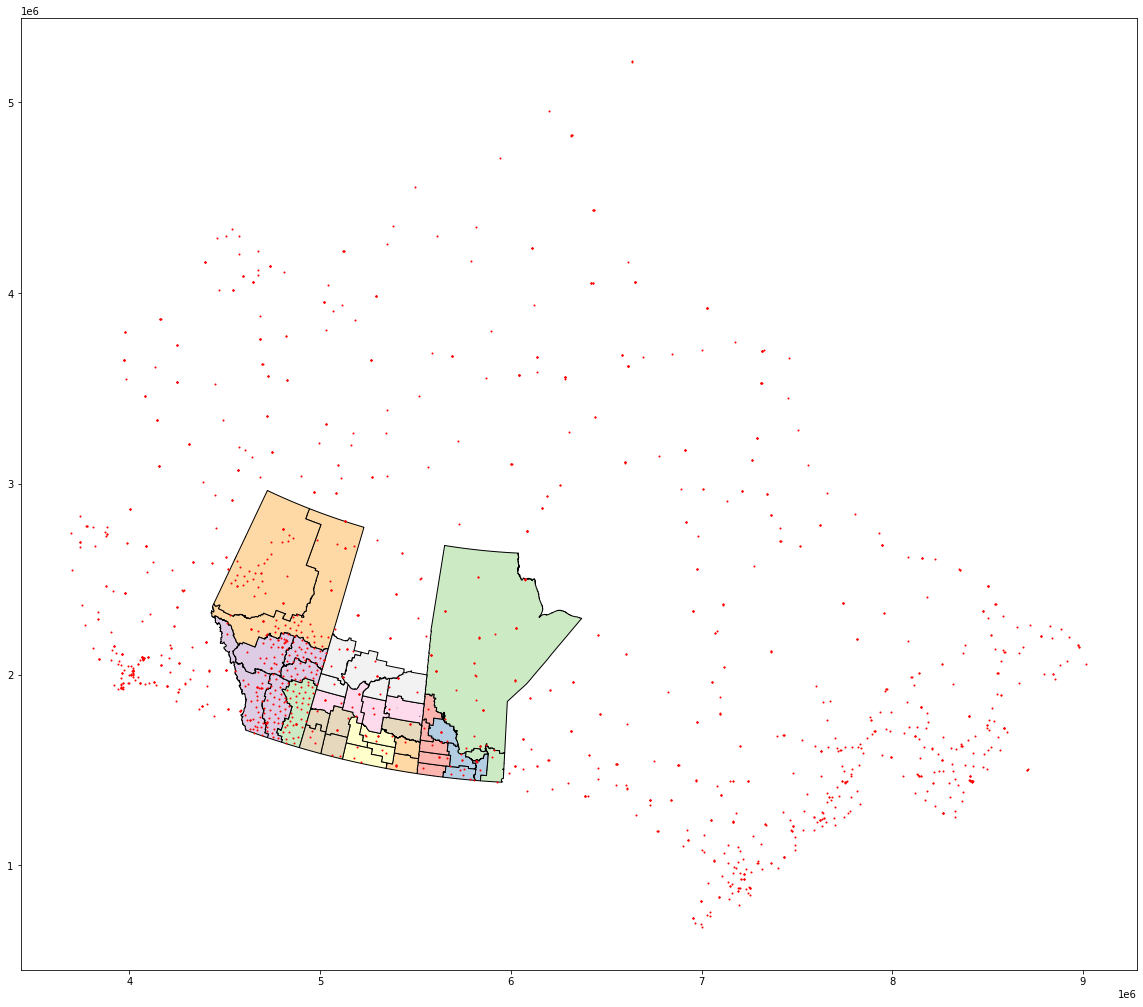

In [68]:
# plot stations vs projected regions
fig, ax = plt.subplots(figsize=(20, 20))
# ax.set_ylim(miny*2, maxy/1.7)
# ax.set_xlim(minx*1.15, maxx/1.4)
gdfRegions.plot(ax=ax, cmap="Pastel1", edgecolor="black")
gdfStations.plot(ax=ax, color="red", markersize=1)

In [69]:
gdfStationRegion = gpd.sjoin(gdfStations, gdfRegions, how="left", op="within")

In [70]:
gdfStations.count()

Station Name      1441
Province          1441
Latitude          1441
Longitude         1441
Elevation         1441
Climate ID        1441
WMO Identifier    1023
TC Identifier     1412
First Year        1441
Last Year         1441
HLY First Year    1441
HLY Last Year     1441
DLY First Year    1353
DLY Last Year     1353
MLY First Year     709
MLY Last Year      709
geometry          1441
dtype: int64

In [71]:
gdfRegions.count()

CARname     40
geometry    40
color       40
CRnum       40
dtype: int64

In [72]:
gdfStationRegion

,Station Name,Province,Latitude,Longitude,Elevation,Climate ID,WMO Identifier,TC Identifier,First Year,Last Year,...,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year,geometry,index_right,CARname,color,CRnum
13,ABBOTSFORD A,BRITISH COLUMBIA,49.03,-122.36,59.1,1100032,NaN,YXX,2016,2022,...,2022.0,2018.0,2022.0,NaN,NaN,POINT (4054779.178 1956623.277),NaN,NaN,NaN,NaN
14,ABBOTSFORD A,BRITISH COLUMBIA,49.03,-122.36,59.1,1100030,71108.0,YXX,1944,2012,...,2012.0,1944.0,2012.0,1944.0,2012.0,POINT (4054779.178 1956623.277),NaN,NaN,NaN,NaN
15,ABBOTSFORD A,BRITISH COLUMBIA,49.03,-122.36,59.1,1100031,71108.0,YXX,2011,2022,...,2022.0,2012.0,2022.0,NaN,NaN,POINT (4054779.178 1956623.277),NaN,NaN,NaN,NaN
19,ABEE AGDM,ALBERTA,54.28,-112.97,664.0,3010010,71285.0,XAF,1990,2022,...,2022.0,2002.0,2022.0,2002.0,2007.0,POINT (4873611.671 2233163.584),18.0,Census Agricultural Region 6,#808080,0.0
32,ACADIA VALLEY,ALBERTA,51.07,-110.32,735.0,3020035,71048.0,PAC,2009,2022,...,2022.0,2009.0,2022.0,NaN,NaN,POINT (4934211.186 1843262.910),12.0,Census Agricultural Region 1,#00FF00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8530,YOHO PARK,BRITISH COLUMBIA,51.44,-116.34,1602.0,11790J1,71786.0,WYL,1992,2022,...,2022.0,1992.0,2022.0,1993.0,2006.0,POINT (4554514.691 2019704.313),NaN,NaN,NaN,NaN
8532,YORKTON,SASKATCHEWAN,51.26,-102.46,498.3,4019075,71292.0,YQV,2011,2022,...,2022.0,2011.0,2022.0,NaN,NaN,POINT (5469944.787 1740256.616),30.0,Census Agricultural Region 5A,#9400D3,6.0
8533,YORKTON,SASKATCHEWAN,51.26,-102.46,498.4,4019073,71886.0,PRJ,2011,2022,...,2022.0,2011.0,2022.0,NaN,NaN,POINT (5469944.787 1740256.616),30.0,Census Agricultural Region 5A,#9400D3,6.0
8535,YORKTON,SASKATCHEWAN,51.26,-102.46,498.3,4019085,71138.0,YQV,2005,2011,...,2011.0,2005.0,2011.0,2005.0,2007.0,POINT (5469944.787 1740256.616),30.0,Census Agricultural Region 5A,#9400D3,6.0


In [74]:
gdfStationRegion.columns

Index(['Station Name', 'Province', 'Latitude', 'Longitude', 'Elevation',
       'Climate ID', 'WMO Identifier', 'TC Identifier', 'First Year',
       'Last Year', 'HLY First Year', 'HLY Last Year', 'DLY First Year',
       'DLY Last Year', 'MLY First Year', 'MLY Last Year', 'geometry',
       'index_right', 'CARname', 'color', 'CRnum'],
      dtype='object')

In [75]:
gdfStationRegion.drop(
    columns={
        "Station Name",
        "Province",
        "Latitude",
        "Longitude",
        "Elevation",
        "WMO Identifier",
        "TC Identifier",
        "First Year",
        "Last Year",
        "HLY First Year",
        "HLY Last Year",
        "DLY First Year",
        "DLY Last Year",
        "MLY First Year",
        "MLY Last Year",
        "index_right",
    },
    inplace=True,
)

In [76]:
gdfStationRegion

,Climate ID,geometry,CARname,color,CRnum
13,1100032,POINT (4054779.178 1956623.277),NaN,NaN,NaN
14,1100030,POINT (4054779.178 1956623.277),NaN,NaN,NaN
15,1100031,POINT (4054779.178 1956623.277),NaN,NaN,NaN
19,3010010,POINT (4873611.671 2233163.584),Census Agricultural Region 6,#808080,0.0
32,3020035,POINT (4934211.186 1843262.910),Census Agricultural Region 1,#00FF00,8.0
...,...,...,...,...,...
8530,11790J1,POINT (4554514.691 2019704.313),NaN,NaN,NaN
8532,4019075,POINT (5469944.787 1740256.616),Census Agricultural Region 5A,#9400D3,6.0
8533,4019073,POINT (5469944.787 1740256.616),Census Agricultural Region 5A,#9400D3,6.0
8535,4019085,POINT (5469944.787 1740256.616),Census Agricultural Region 5A,#9400D3,6.0


In [77]:
gdfStationRegion.reset_index()

,index,Climate ID,geometry,CARname,color,CRnum
0,13,1100032,POINT (4054779.178 1956623.277),NaN,NaN,NaN
1,14,1100030,POINT (4054779.178 1956623.277),NaN,NaN,NaN
2,15,1100031,POINT (4054779.178 1956623.277),NaN,NaN,NaN
3,19,3010010,POINT (4873611.671 2233163.584),Census Agricultural Region 6,#808080,0.0
4,32,3020035,POINT (4934211.186 1843262.910),Census Agricultural Region 1,#00FF00,8.0
...,...,...,...,...,...,...
1436,8530,11790J1,POINT (4554514.691 2019704.313),NaN,NaN,NaN
1437,8532,4019075,POINT (5469944.787 1740256.616),Census Agricultural Region 5A,#9400D3,6.0
1438,8533,4019073,POINT (5469944.787 1740256.616),Census Agricultural Region 5A,#9400D3,6.0
1439,8535,4019085,POINT (5469944.787 1740256.616),Census Agricultural Region 5A,#9400D3,6.0


In [78]:
gdfStationRegion.dropna(inplace=True)

In [79]:
gdfStationRegion.to_csv("Regions/StationRegion.csv")

In [73]:
# dfQuality = pd.read_csv('Data/RegionQualityData.csv')